# Data Analysis of Amazon Fashion Sales

This Jupyter Notebook is to analyze the sales, based on dataset `products.csv` after data cleansing.

**Objective:** Shows the data clearly to generate valuable insights about wich happened previously.

## Step 1: Configure Where Is Possible Import Modules

Sice it is Jupyter Notebook here, is necessary configure the path with modules to import the custom function `clean_data_amazon()`.

In [6]:
#================================================================================
# CONFIGS TO IMPORT CUSTOM MODULE
#================================================================================

# Import os to get current work directory and absolute path
import os
# Import sys to check whether project root is on list of modules and packages
import sys

# Build absolute path to project_root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Insert project root in sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

## Step 2: Import Libs and Load Dataset to Clean

First, imports libs to load dataset and plot graphics. After, load dataset and clear data with custom function imported.

In [7]:
#================================================================================
# IMPORTS
#================================================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.data_cleaner import clean_amazon_data

#================================================================================
# DATA LOAD AND CLEANER
#================================================================================

# Load raw data
try:
    df_raw = pd.read_csv("../data/raw/products.csv", sep=",")
except FileNotFoundError:
    print("Document not found.")
    
# Clean data using function
df = clean_amazon_data(df_raw)

# Set plot style
sns.set_style(style="whitegrid")

# Shows firts 5 rows of clean dataset
df.head()

,product_id,brand,title,price,category,rating
843,B00N1997B0,GUESS,"""Basic G Logo Heart Link Bracelet, One Size, O...",49.00,New season,4.2
6989,B09C1ZH9NH,Other,"""Contemporary Kundan Collection"" Indian Bollyw...",32.29,Outlet,4.1
12338,B087Q5LS5W,Other,'ChainsHouse Stainless Steel Cuban Link Bracel...,76.98,Accessories,4.4
12936,B09GY81DSV,Other,'Dankadi Men 925 Sterling Silver Bracelet Fash...,173.06,Accessories,3.6
13142,B09JJNXNGV,Other,'H&Beautimer Punk Men Box chain Bracelet 925 S...,204.28,Accessories,4.8


## Step 3: Plot Graphs

Finally, just plot necessary graphs.

**Graph 1:** Bar Chart to shows distribution of prices, both without log and the with log.

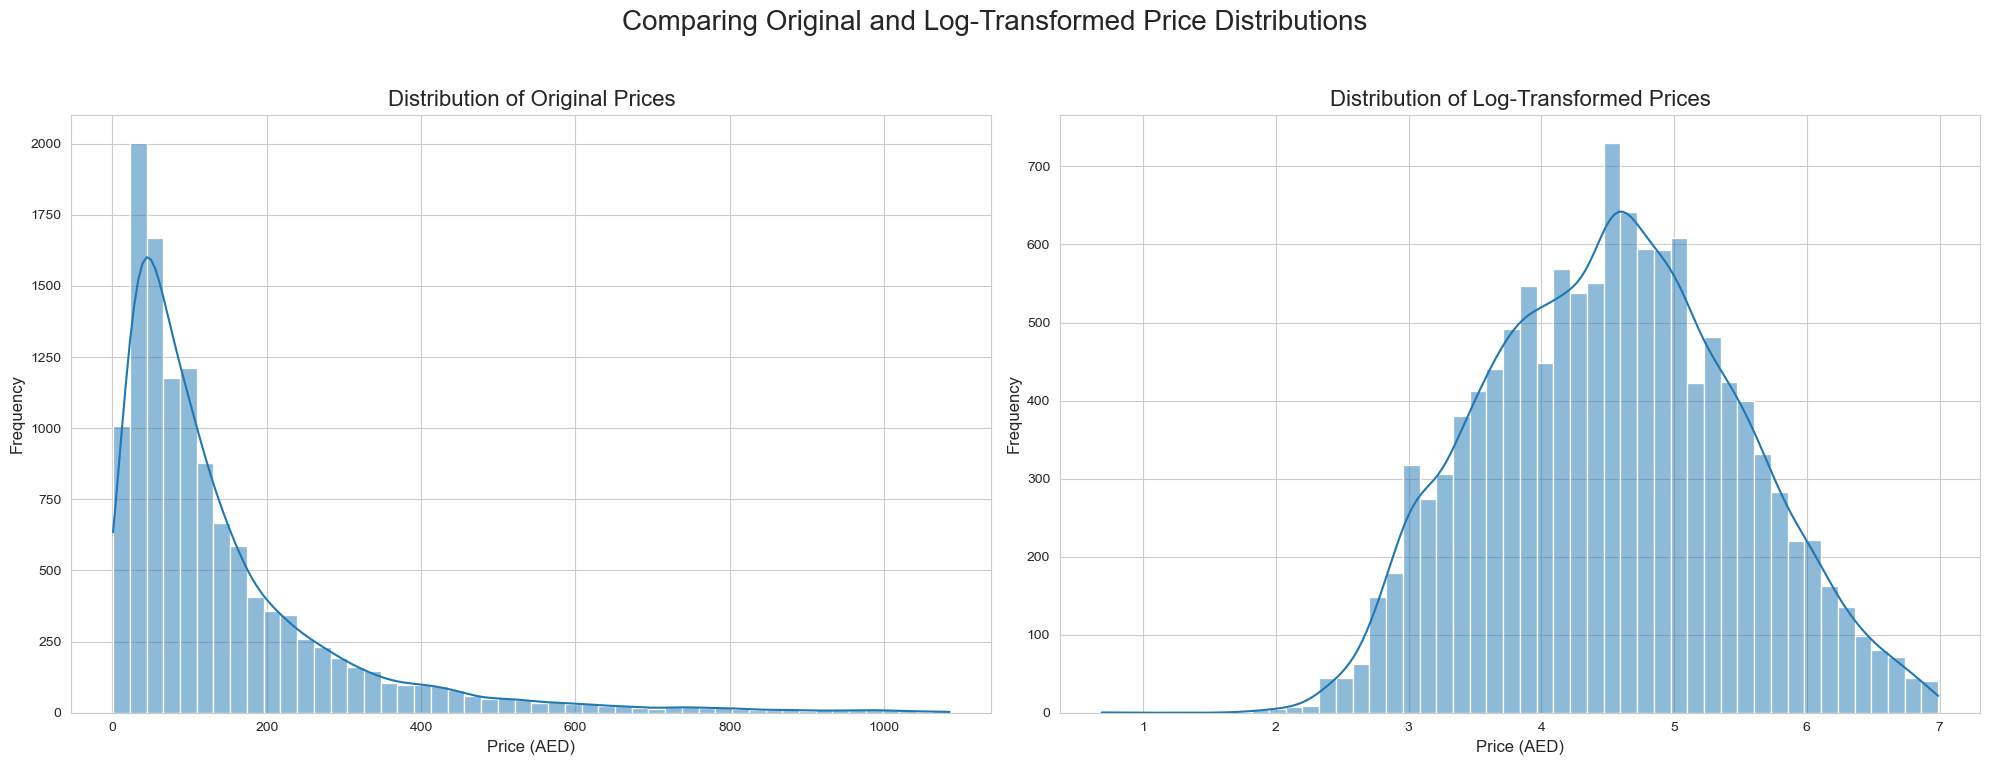

In [11]:
# Import numpy for log transformation
import numpy as np

# 99th percentile
price_cap = df["price"].quantile(0.99)

# Filter prices that are less than 99th percentile
df_plot = df[df["price"] < price_cap].copy()

# Create a new column with log price transformation
df_plot["log_price"] = np.log1p(df_plot["price"])

fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the distribution of prices
sns.histplot(data=df_plot, x="price", bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Original Prices", fontsize=16)
axes[0].set_xlabel("Price (AED)", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Plotting the distribution of log prices
sns.histplot(data=df_plot, x="log_price", bins=50, kde=True)
axes[1].set_title("Distribution of Log-Transformed Prices", fontsize=16)
axes[1].set_xlabel("Price (AED)", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Add a main title for the entire figure
fig.suptitle("Comparing Original and Log-Transformed Price Distributions", fontsize=20)

# Adjust layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()